###### importing requeired libs 

In [1]:
import json
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


### Working on first json file

In [2]:
landing_page = []
goal_one = []

with open('Goal1CompletionLocation_Goal1Completions.json') as data_file:    
    data = json.load(data_file)
    
list_of_dict = data['reports'][0]['data']['rows']
for dictionary in list_of_dict:
    landing_page.append(dictionary['dimensions'][0])
    goal_one.append(int(dictionary['metrics'][0]['values'][0]))
    
goals_df = pd.DataFrame(data = {'page': landing_page, 'goal_one': goal_one})
goals_df.head()

    


,goal_one,page
0,6,(entrance)
1,85,/
2,1,/portfolio-single-gallery.html
3,22,/TMRW_Byte_Cafe.php
4,24,/TMRW_FAQs.php


### Working on second json file

In [3]:
landing_page = []
sessions = []

with open('Sessions_Page.json') as data_file:    
    data = json.load(data_file)
    
list_of_dict = data['reports'][0]['data']['rows']
for dictionary in list_of_dict:
    landing_page.append(dictionary['dimensions'][0])
    sessions.append(int(dictionary['metrics'][0]['values'][0]))
    
sessions_df = pd.DataFrame(data = {'page': landing_page, 'sessions': sessions})
sessions_df.head()

    


,page,sessions
0,/,5925
1,/?_hsenc=p2ANqtz-_McBb_ag9eyaYD3mJjDG7G_uB3uhg...,1
2,/?_hsenc=p2ANqtz-_ORc__Ui5VKSGvLO72LiNTFW98hg-...,1
3,/?_hsenc=p2ANqtz-_PMnaFvC1MTCPb_RghCCNcPyb6VHP...,1
4,/?_hsenc=p2ANqtz--3SZ9_TxAeV_6dUflCeBmtEy9p5-k...,1


### merging dataframes by key

In [7]:
merged = pd.merge(sessions_df, goals_df, on='page')
merged['conversion_rate'] = merged['goal_one'] / merged['sessions'] * 100
merged

,page,sessions,goal_one,conversion_rate
0,/,5925,85,1.434599
1,/portfolio-single-gallery.html,2,1,50.000000
2,/TMRW_Byte_Cafe.php,270,22,8.148148
3,/TMRW_FAQs.php,129,24,18.604651
4,/TMRW_Get_in_touch.php,4,3,75.000000
5,/TMRW_the_team.php,140,5,3.571429


### graph ploting

The best converting page on your site is "/TMRW_Get_in_touch.php" with conversion rate 75.0 %.


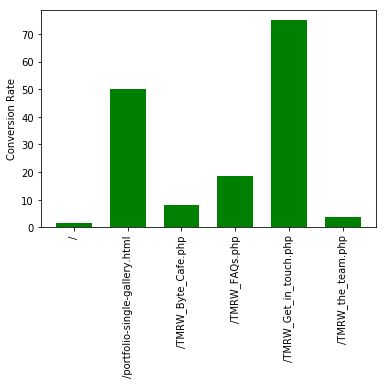

In [6]:
max_info = merged.loc[merged['conversion_rate'].idxmax()]
print 'The best converting page on your site is "{}" with conversion rate {} %.'\
.format(max_info['page'],max_info['conversion_rate'])

y = merged.conversion_rate
N = len(y)
x = range(N)
plt.xticks(x, merged.page, rotation='vertical')
plt.ylabel('Conversion Rate')
width = 1/1.5

plt.bar(x, y, width, color="green")
plt.show()